In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Establecemos la ruta del fichero
archivo_origen = 'Empleados2023.xlsx'

In [6]:
#Leemos la hoja del excel y la llevamos a un dataframe
#hojas_excel = pd.ExcelFile(archivo_origen).sheet_names
df = pd.read_excel(archivo_origen,sheet_name='2023')
print(df)

        Trabajador  Mes  Facturacion  Coste Salario  Coste Dietas  \
0     Trabajador 1    1        13566           6430           627   
1     Trabajador 2    1         8395           6006           652   
2     Trabajador 3    1        14903           3959           583   
3     Trabajador 4    1        11556           6020           590   
4     Trabajador 5    1        13168           6139           711   
..             ...  ...          ...            ...           ...   
235  Trabajador 16   12          704           6716           941   
236  Trabajador 17   12         8003           6358           744   
237  Trabajador 18   12        11890           3637           920   
238  Trabajador 19   12         5677           3823           899   
239  Trabajador 20   12         3288           3730           653   

     Coste Extra Empleado  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
.. 

In [7]:
# Sumar la facturación mensual por trabajador
df['Facturacion Anual'] = df.groupby('Trabajador')['Facturacion'].transform('sum')

# Obtener los 3 trabajadores que más han facturado anualmente
top_trabajadores = df.groupby('Trabajador')['Facturacion Anual'].max().nlargest(3)

print(df)


        Trabajador  Mes  Facturacion  Coste Salario  Coste Dietas  \
0     Trabajador 1    1        13566           6430           627   
1     Trabajador 2    1         8395           6006           652   
2     Trabajador 3    1        14903           3959           583   
3     Trabajador 4    1        11556           6020           590   
4     Trabajador 5    1        13168           6139           711   
..             ...  ...          ...            ...           ...   
235  Trabajador 16   12          704           6716           941   
236  Trabajador 17   12         8003           6358           744   
237  Trabajador 18   12        11890           3637           920   
238  Trabajador 19   12         5677           3823           899   
239  Trabajador 20   12         3288           3730           653   

     Coste Extra Empleado  Facturacion Anual  
0                     NaN              55017  
1                     NaN              97226  
2                     NaN     

In [9]:
print(top_trabajadores)

Trabajador
Trabajador 18    115330
Trabajador 10    110925
Trabajador 6     109673
Name: Facturacion Anual, dtype: int64


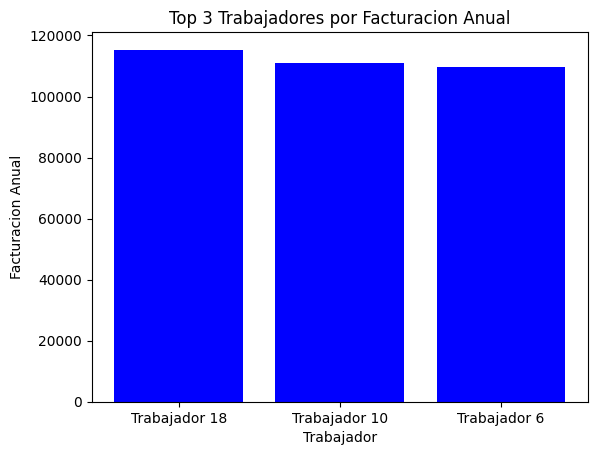

In [8]:
# Crear un gráfico de barras
plt.bar(top_trabajadores.index, top_trabajadores.values, color='blue')
plt.xlabel('Trabajador')
plt.ylabel('Facturacion Anual')
plt.title('Top 3 Trabajadores por Facturacion Anual')
plt.show()

In [12]:
#Arreglamos la columna para quitar valores NaN
df['Coste Extra Empleado'].fillna(0,inplace=True)
#Antes de generar la columna margen debiamos haber arreglado las otras columnas con datos NaN
df['Margen'] = df['Facturacion']-(df['Coste Salario']+df['Coste Dietas'] + df['Coste Extra Empleado'])

In [13]:
print(df)

        Trabajador  Mes  Facturacion  Coste Salario  Coste Dietas  \
0     Trabajador 1    1        13566           6430           627   
1     Trabajador 2    1         8395           6006           652   
2     Trabajador 3    1        14903           3959           583   
3     Trabajador 4    1        11556           6020           590   
4     Trabajador 5    1        13168           6139           711   
..             ...  ...          ...            ...           ...   
235  Trabajador 16   12          704           6716           941   
236  Trabajador 17   12         8003           6358           744   
237  Trabajador 18   12        11890           3637           920   
238  Trabajador 19   12         5677           3823           899   
239  Trabajador 20   12         3288           3730           653   

     Coste Extra Empleado  Facturacion Anual   Margen  
0                     0.0              55017   6509.0  
1                     0.0              97226   1737.0  
2  

In [14]:
#Hacemos una copia
df_copy = df

In [26]:
#Generamos una serie agrupando por la sumatoria de la columna Margen, con el indice de trabajador
df_margen = df.groupby('Trabajador')['Margen'].sum()
nombre_columnas = df_margen.index.tolist()
#print (nombre_columnas)
#print(df_margen)
df_margen_ordenado = df_margen.sort_values(ascending=False)
print(df_margen_ordenado)

Trabajador
Trabajador 18    62983.0
Trabajador 19    50922.0
Trabajador 15    40500.0
Trabajador 3     33051.0
Trabajador 5     26252.0
Trabajador 6     19495.0
Trabajador 17    19006.0
Trabajador 7     17905.0
Trabajador 10    17804.0
Trabajador 4     17736.0
Trabajador 2     15688.0
Trabajador 11     8520.0
Trabajador 14     3732.0
Trabajador 9      2829.0
Trabajador 20     1397.0
Trabajador 12       56.0
Trabajador 16   -12017.0
Trabajador 13   -13606.0
Trabajador 1    -31095.0
Trabajador 8    -33454.0
Name: Margen, dtype: float64


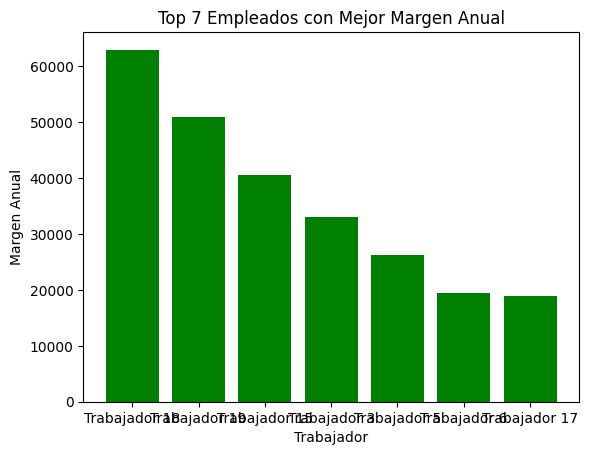

In [27]:
#Cuando tenemos ya la serie, queda representarla
top_7_empleados_anual = df_margen_ordenado.nlargest(7)

# Crear un gráfico de barras
plt.bar(top_7_empleados_anual.index, top_7_empleados_anual.values, color='green')
plt.xlabel('Trabajador')
plt.ylabel('Margen Anual')
plt.title('Top 7 Empleados con Mejor Margen Anual')
plt.show()